In [197]:
import numpy as np
from sklearn.datasets import load_boston
from numpy.linalg import inv
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [198]:
data=load_boston()
X=data.data[0:,[2,6]]
Y=data.target
X.shape

(506, 2)

In [199]:
class Adaline:
    def __init__(self):
        pass
    def fit(self,x_train,y_train):
        # m=(X.T*X)^-1*X.T*Y
        self.m=np.matmul(inv(np.matmul(x_train.T, x_train)), np.matmul(x_train.T, y_train))
        return self.m
    
    def predict(self, x_test):
        y_predict = np.matmul(x_test, self.m)
        return y_predict
    
    def evaluate_MAE(self,X_test,Y_test):
        Y_pred=np.matmul(X_test, self.m)
        subtract=np.abs(Y_test-Y_pred)
        avg=np.mean(subtract)
        return avg
    
    def evaluate_MSE(self,X_test,Y_test):
        Y_pred=np.matmul(X_test, self.m)
        subtract=np.square(Y_test-Y_pred)
        avg=np.mean(subtract)
        return avg

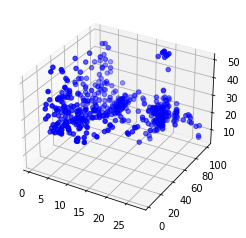

In [200]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0],X[:,1],Y , c='blue')
plt.show()

In [201]:
Y.reshape(506,1)
model=Adaline()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25,random_state=4)
model.fit(X_train,Y_train)
y_pr=model.predict(X_test)
y_pr.reshape(127,1)

array([[30.49784338],
       [ 4.95742528],
       [ 9.39476295],
       [24.93723846],
       [26.73064297],
       [-3.91552663],
       [ 6.96911041],
       [18.99928136],
       [24.60435912],
       [22.35046439],
       [ 7.66626673],
       [16.55398576],
       [ 7.53862433],
       [21.15938536],
       [14.89528888],
       [22.53748669],
       [24.50741653],
       [16.82731373],
       [24.60435912],
       [25.33275863],
       [24.60435912],
       [23.22625779],
       [18.78348503],
       [29.0844153 ],
       [14.46132099],
       [25.68633691],
       [28.93085636],
       [20.56426505],
       [15.77636165],
       [27.26276503],
       [16.93240894],
       [ 9.11315818],
       [30.81788076],
       [ 9.64020194],
       [23.55340704],
       [24.18397828],
       [20.14053064],
       [ 2.38358647],
       [20.79613338],
       [-3.4951458 ],
       [ 4.33050326],
       [22.84090869],
       [24.60435912],
       [ 1.78017423],
       [27.43127769],
       [ 8

In [202]:

# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib import cm
# fig = plt.figure()
# ax = plt.axes(projection='3d')
# ax.scatter(X_test[:,0],X_test[:,1],y_pr , c='red')
# Y=y_pr.reshape(127,1)
# ax.plot_surface(X_test[:,0], X_test[:,1], Y )
# ax.set_xlabel('CRIM')
# ax.set_ylabel('AGE')
# ax.set_zlabel('weights')
# ax.view_init(-140, 60)
# plt.show()


In [203]:
# from skspatial.objects import Plane
# from skspatial.objects import Points
# from skspatial.plotting import plot_3d

# X=np.array(X,dtype='int')
# Y=np.array(Y,dtype='int')
# p=np.concatenate((X_test,Y),axis=1)
# print(X_test.shape)
# print(p.shape)
# points = Points(p)
# plane = Plane.best_fit(points)
# plot_3d(
#     points.plotter(c='k', s=50, depthshade=False),
#     plane.plotter(alpha=0.2, lims_x=(-5, 5), lims_y=(-5, 5)),
# )

(379, 2)


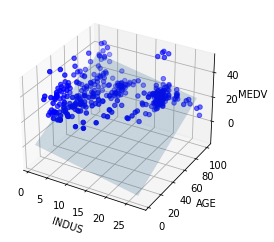

In [204]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# X_train=np.array(X_train)
print(X_train.shape)
#xy points
x_range = np.arange(X_train[:,0].min(), X_train[:,0].max())
y_range = np.arange(X_train[:,1].min(), X_train[:,1].max())
#make 2D x,y array
x, y = np.meshgrid(x_range, y_range)
#z=X*a1+Y*a2
#formulla :/
m = model.m
z = x * m[0] + y * m[1]
ax.plot_surface(x, y, z, alpha = 0.2)
ax.scatter(X_train[:,0],X_train[:,1],Y_train, c='blue')
ax.set_xlabel('INDUS')
ax.set_ylabel('AGE')
ax.set_zlabel('MEDV')
plt.show()

In [205]:
MAE=model.evaluate_MAE(X_test,Y_test)
MSE=model.evaluate_MSE(X_test,Y_test)
print('MAE:',MAE)
print('MSE:',MSE)

MAE: 12.641669182277115
MSE: 258.3781225142801
